## White noise, fractional gaussian noise and brownian motion

## Import packages

In [3]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds


## White noise

In [5]:
WD_PATH = os.path.dirname(os.getcwd())
print(WD_PATH)
separator    = ''
fractal_path = separator.join([WD_PATH,'/data/external/fathon_test'])
print(fractal_path)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/data/external/fathon_test


In [37]:
wn = np.loadtxt(separator.join([fractal_path,'/whitenoise.txt']))
wn.shape[0]

8000

## Correlation dimension 

The Lorenz attractor is a strange attractor. Therefore, we can compute fractal dimension of the attractor area via correlation dimension. It is expected to be 2.06 according to Procaccia et al. 1983

In [8]:
sd_x= np.std(wn, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 1.0* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(wn,emb_dim=1, rvals=rvals_vect, debug_data=True)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


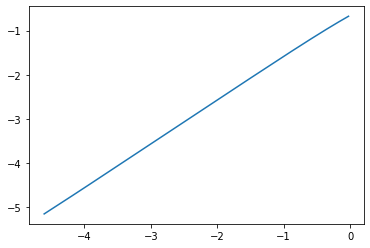

In [9]:
plt.plot(set_cr[0],set_cr[1])

In [10]:
print(dim_corr)

0.9880216776445829


## Sample Entropy

Estimation of entropy follows the concept of the correlation dimension.

In [14]:
sd_x       = np.std(wn, ddof=1)
nolds.sampen(wn, emb_dim=1, tolerance= 0.2*sd_x)

2.1825314118796038

## Hurst exponent

Estimation of the Hurst Exponent via Fathon

In [27]:
nMin = 8
nMax = 2**10
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [28]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [29]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [30]:
H,n_w,F_w = test_mat_dfa_lorenz(wn)
print(H)

0.46920532119536806


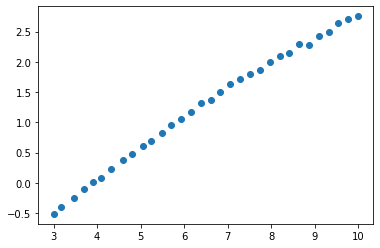

In [31]:
plt.scatter(np.log2(n_w), np.log2(F_w))

Formula according with https://journals.aps.org/pre/abstract/10.1103/PhysRevE.53.5445. However, Hurst exponent is defined 

In [32]:
Hurst_corrdim = 1-dim_corr/2
print(Hurst_corrdim)

0.5059891611777085


Estimation of Hurst via nolds

In [34]:
h = nolds.dfa(wn)
print(h)

0.4987738519760821


/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


## SPECTRUM Slope

In [38]:
from scipy.signal import welch

NSEG     = (wn.shape[0] + 1)/10
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(wn, fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

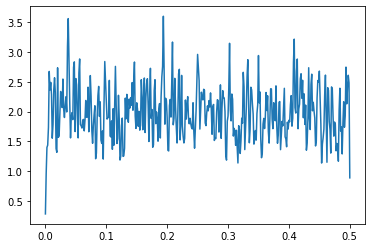

In [39]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


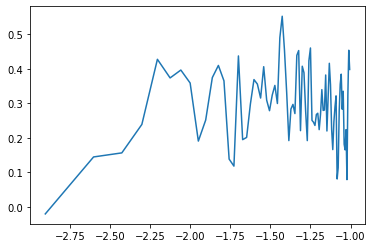

In [40]:
f_loc  = np.where(f<0.1)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [42]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta)

0.036136265453128515


In [43]:
beta_corrdim = 1-dim_corr
print(beta_corrdim)

0.01197832235541707


## Fractional Brownian Motion: Hurst exponent and Spectrum Slope

In [153]:
N_bm_frac = 3000
bm_frac   = nolds.fbm(N_bm_frac, H=0.75)

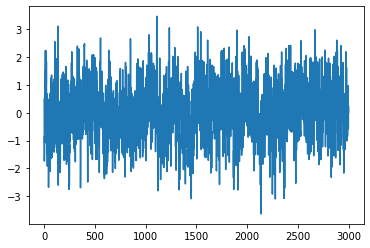

In [154]:
plt.plot(np.diff(bm_frac))

Estimation of the Hurst Exponent via Fathon

In [155]:
nMin = 16
nMax = 2**10
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [156]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [157]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [158]:
H,n_w,F_w = test_mat_dfa_lorenz(np.diff(bm_frac))
print(H)

0.742896927421095


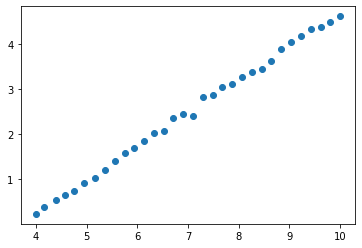

In [159]:
plt.scatter(np.log2(n_w), np.log2(F_w))

Estimation of Hurst via nolds

In [160]:
h = nolds.dfa(np.diff(bm_frac))
print(h)

0.780583307474599


/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


In [161]:
from scipy.signal import welch

NSEG     = (N_bm_frac + 1)/20
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(np.diff(bm_frac), fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

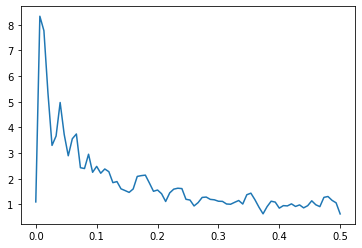

In [162]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


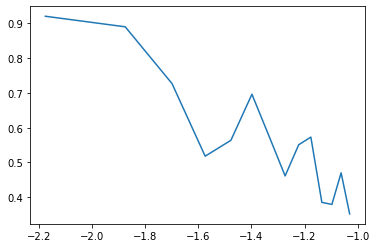

In [163]:
f_loc  = np.where(f<0.1)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [164]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta)

-0.4760083028805555


In [165]:
beta_hurst = -(2*H-1)
print(beta_hurst)

-0.48579385484219006


## Fractional Gaussian Noise: Hurst exponent and Spectrum Slope

In [166]:
N_wn_frac = 2000
wn_frac   = nolds.fgn(N_wn_frac, H=0.75)

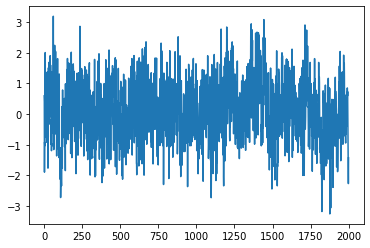

In [167]:
plt.plot(wn_frac)

Estimation of the Hurst Exponent via Fathon

In [168]:
nMin = 8
nMax = 2**8
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [169]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [170]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [171]:
H,n_w,F_w = test_mat_dfa_lorenz(wn_frac)
print(H)

0.7610378788467208


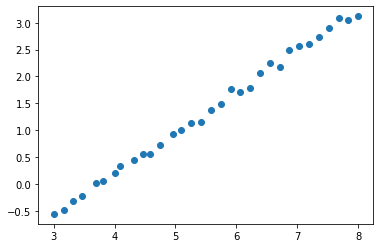

In [172]:
plt.scatter(np.log2(n_w), np.log2(F_w))

Estimation of Hurst via nolds

In [173]:
h = nolds.dfa(wn_frac)
print(h)

0.7822326475574396


/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


In [174]:
from scipy.signal import welch

NSEG     = (N_wn_frac + 1)/20
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(wn_frac, fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

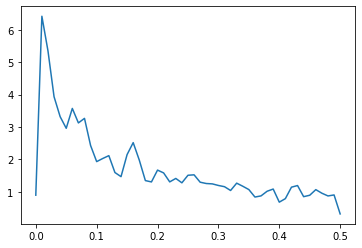

In [175]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


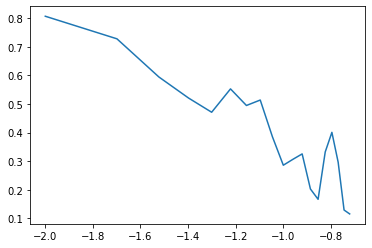

In [176]:
f_loc  = np.where(f<0.2)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [177]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta)

-0.5037182503567166


In [178]:
beta_hurst = -(2*H-1)
print(beta_hurst)

-0.5220757576934416
